<a href="https://colab.research.google.com/github/ThiagoHColtro/TradeBalance/blob/main/BC_saldo_balan%C3%A7a_comercial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANÁLISE DO HISTÓRICO DO SALDO DA BALANÇA COMERCIAL BRASILEIRA**


O presente projeto tem como objetivo analisar o histórico da balança comercial do Brasil, a fim de responder:

1) Se a balança comercial é históricamente superavitária ou deficitária;

2) De que modo a variação da taxa cambial impacta as exportações e importações e, consequentemente, o saldo da balança comercial;

3) Quais outros fatores endógenos e exógenos podem explicar alterações nas exportações e importações.


Importante destacar que as informações incluídas na presente análise limitam-se àquelas obtidas até o mês de maio do ano de 2025, de modo que a análise referente a este ano é apenas parcial.

Para atender aos fins da presente análise, foram escolhidas os bens com maior representação na balança comercial brasileira, dentre os bens e serviços exportados e importados: soja, minério de ferro, petróleo bruto, carne bovina, açúcar, café.

Esta análise é exploratória e focada em relações visuais e contextuais entre a balança comercial, taxa de câmbio e preços de commodities. Não foram aplicados modelos estatísticos mais avançados, como regressões ou testes de causalidade, por não ser o objetivo principal neste momento.

Fontes:

A análise utiliza dados de diversas fontes:

a) Os dados acerca da balança comercial, fornecidos pelo Banco Central do Brasil. Foram obtidos mediante acesso ao portal "ComexVis", do Ministério de Desenvolvimento, Indústria, Comércio e Serviços.

Os dados referentes ao saldo da Balança Comercial e Serviços do Brasil tem como base os valores das transações de itens que são resultados de processos produtivos.Os valores apresentados tem como unidade de medida a de "milhões de dólares americanos".

A última alteração nos metadados ocorreu em 16/04/2025, tendo o acesso ao banco de dados ocorrido na data de 30/06/2025.

b) Também foram utilizados dados do Banco Central acerca da varição da taxa de câmbio do real face ao dólar americano, série histórica da cotação de compra da moeda estrangeira, em um sistema de câmbio flutuante.
A última alteração nos metadados ocorreu em 26/03/2025.

c) Por fim, foi utilizado o histórico de preços das principais commodities exportadas pelo Brasil, obtidos na "Pink Sheet" da Organização Mundial de Comércio, atualizados até julho de 2025.

A OMC utiliza como valores unitários para cálculo dos preços internacionais das commodities, de modo que:
- Para óleo bruto de petróleo é usada a unidade "\$/bbl" (dólares por barril);
- Soja tem como base a unidade "\$/mt" (dólares por tonelada métrica);
- Minério de ferro tem seu preço em dólares definido pelo conteúdo metálico em uma tonelada seca de minério, unidade "\$/dmtu" (unidade seca por tonelada métrica);
- Café, açúcar e carne bovina são calculados com base na unidade "\$/kg" (dólares por quilo).

Quanto aos principais bens importados, foram extraídos dados diretamente do portal ComexVis para cada um dos grupos de produtos com maior participação no total de importações: Adubos e fertilizantes químicos; Óleos combustíveis de petróleo ou minerais betuminosos; Motores e máquinas não elétricos; Válvulas e tubos termiônicas; Veículos automóveis de passageiros.
O preço de todos estes bens está calculado com base na unidade "\$/kg" (dólares por quilo).


Embora esta análise tenha se concentrado em correlações, variações e comparações descritivas, técnicas econométricas adicionais poderiam ser aplicadas para aprofundar os resultados.

Por exemplo, testes de estacionariedade, como o Augmented Dickey-Fuller (ADF), permitiriam avaliar se as séries temporais da taxa de câmbio, preços de commodities e saldo da balança comercial apresentam comportamento estável ao longo do tempo — requisito importante para certos modelos de previsão.
Da mesma forma, modelos de regressão linear ou múltipla poderiam estimar a magnitude do impacto de variáveis macroeconômicas sobre o saldo comercial, controlando fatores externos. Essas ferramentas, contudo, exigem tratamento estatístico mais rigoroso e um escopo metodológico distinto, razão pela qual não foram implementadas neste estudo, mas permanecem como perspectivas para trabalhos futuros.


# 1. Importação dos dados
## 1.1. Bibliotecas

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2. Dataset

As tabelas de exportação e importação encontravam-se separadas. Para facilitar a visualização dos dados, optei por juntar ambas e criar uma coluna "saldo" a partir dessas.

In [107]:
DataExp = pd.read_excel('H_EXPORTACAO_GERAL_1997-01_2025-12_DT20250711.xlsx')
DataExp

,Mês,2025 - Valor US$ FOB,2024 - Valor US$ FOB,2023 - Valor US$ FOB,2022 - Valor US$ FOB,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB,2018 - Valor US$ FOB,2017 - Valor US$ FOB,...,2006 - Valor US$ FOB,2005 - Valor US$ FOB,2004 - Valor US$ FOB,2003 - Valor US$ FOB,2002 - Valor US$ FOB,2001 - Valor US$ FOB,2000 - Valor US$ FOB,1999 - Valor US$ FOB,1998 - Valor US$ FOB,1997 - Valor US$ FOB
0,12,0,24881044787,28786226565,26342396058,24432406778,18451708927,18463268592,19257634148,17476274644,...,12250207591,10905317006,8667937031,6728473371,5211040751,4330618982,4645995542,4667111246,3940827831,4528699520
1,11,0,27857365197,27886116219,27652303451,20501766210,17344900538,17609813357,19199739213,16584235219,...,11874489874,10841578180,8145723119,5918226834,5102634927,4487381285,4374176633,3996446244,3698225717,3972863432
2,10,0,29300866189,29681867318,26852476461,22602637234,17649335596,19483912811,21671364889,18694329848,...,12655903297,9929497189,8177723377,7532647324,6456465000,4943932135,4634820927,4298685972,4010526061,4785884731
3,9,0,28471402288,28713085056,28587334142,24376129510,18223387712,18620814373,19041023535,18533214138,...,12556054220,10658371596,8910068943,7255157716,6478828752,4738230423,4705729616,4178479790,4527631631,4584627988
4,8,0,28736329972,31101089774,30786908834,27216375900,17403775488,19565551588,20084138252,19336799997,...,13646473652,11345352257,9039689359,6386781075,5738521055,5719937959,5516407914,4266851497,3978706756,5071719487
5,7,0,30841394890,28300073730,29844324640,25508595503,19416007176,19920683762,21055288607,17658900096,...,13637840111,11084278042,8962900814,6087497688,6202182481,4957564819,5000307451,4112429031,4966901159,5235223160
6,6,29146676045,28731639979,29600309149,32742194543,28257895138,17478971342,18306721692,19830021392,19535151809,...,11441854586,10220075837,9306490756,5851302730,4064856073,5033408207,4850102157,4304074451,4881133088,4841600876
7,5,29945127667,30190264650,32666140787,29642851197,26200662606,17519841090,20500498556,19271601072,19726040175,...,10277429381,9849729906,7921661037,6363120746,4424075300,5362183737,5060389264,4382344317,4608298209,4654892460
8,4,29900115617,30327524963,27100302410,28969694687,26059431856,17593798650,19090646313,19678336251,17484572350,...,9822123658,9247138198,6581422428,5681705996,4612069084,4713703708,4170220598,3701836009,4573738237,4624157101
9,3,28759273060,27657419417,32822911866,29422320196,24335759852,18312350349,17308721624,20228663646,19854737707,...,11379482701,9258176578,7907130664,5209857493,4251755321,5153769468,4467447649,3825933128,4270735544,3824075802


In [108]:
DataImp = pd.read_excel('H_IMPORTACAO_GERAL_1997-01_2025-12_DT20250711.xlsx')
DataImp

,Mês,2025 - Valor US$ FOB,2024 - Valor US$ FOB,2023 - Valor US$ FOB,2022 - Valor US$ FOB,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB,2018 - Valor US$ FOB,2017 - Valor US$ FOB,...,2006 - Valor US$ FOB,2005 - Valor US$ FOB,2004 - Valor US$ FOB,2003 - Valor US$ FOB,2002 - Valor US$ FOB,2001 - Valor US$ FOB,2000 - Valor US$ FOB,1999 - Valor US$ FOB,1998 - Valor US$ FOB,1997 - Valor US$ FOB
0,12,0,20245157064,19463062497,21809042646,20419466049,15748589294,13248186239,13640421233,13323465863,...,7300971419,6661166815,5767016101,4082553549,3530072754,3592472666,4949723328,4526708585,4532191610,5364601868
1,11,0,21110834322,19097348843,21451985909,21611840519,14856582072,14868295894,15529846968,13951600049,...,8761166328,6806236340,6161108902,4348297888,3936118274,4299682121,5234186865,4617817168,4812451151,5332328817
2,10,0,25209647872,20500945877,23477105126,20538918428,13245304357,16987200927,16921935159,14598898881,...,8830358685,6327019742,5932061045,5107951287,4369881833,4837692394,5327233032,4539759972,5530836362,5713646158
3,9,0,23391814867,19531513320,24892711361,19975447581,13139951686,15362321786,14948421194,14242528368,...,8207792935,6401418258,5834890104,4702376781,4087345435,4246173613,5143575956,4319941100,5810228743,5495530941
4,8,0,24219210009,21468484469,26680226835,19557276638,11585200604,17603930758,19768276314,14789290641,...,9212212077,7784322183,5708244289,3811538042,4258142754,5176029561,5501973736,4548570484,4232706977,5433040732
5,7,0,23289908259,20121012529,24487010025,18128645229,11814764185,18032908964,17759842765,13263065205,...,8085255913,6147753231,5613393139,4122647114,5105908040,4938328065,4960414518,4114886217,5479072265,5852153367
6,6,23257402640,22403501244,19523548217,23852259120,17843605079,10977106324,13944367799,15008152809,13408998263,...,7464246107,6257323744,5614818291,3603900663,3488084005,4842735186,4681709174,4545922079,4777596253,5270826987
7,5,22926950615,21888476596,21688303202,24685194348,17664681736,10681945943,16130590785,14039984530,12968955269,...,7383568872,6462855358,4917995334,3946386523,4154270359,5236592969,4776280858,4171970713,4814205094,4789335402
8,4,22268966372,21896365060,19145984913,20742942801,16096324095,11431019725,14664020352,14653559274,11459643696,...,6845903574,5423850538,4713721088,4081480307,4225843874,4693746465,4078285287,3757415685,4705097801,5590104948
9,3,21028421315,20490209586,22071631023,21809139241,17865278864,14266744622,14066000746,14668560310,13562894075,...,7814875149,5998528365,5422843187,3786968109,3749115387,5530627595,4535322503,4134496194,5245879762,4788930369


# 2. Balança Comercial
## 2.1. Limpeza e tratamento dos dados

In [109]:
DataImp.columns = DataImp.columns.str.replace(' - Valor US$ FOB', '', regex=False)
DataImp.head()

,Mês,2025,2024,2023,2022,2021,2020,2019,2018,2017,...,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997
0,12,0,20245157064,19463062497,21809042646,20419466049,15748589294,13248186239,13640421233,13323465863,...,7300971419,6661166815,5767016101,4082553549,3530072754,3592472666,4949723328,4526708585,4532191610,5364601868
1,11,0,21110834322,19097348843,21451985909,21611840519,14856582072,14868295894,15529846968,13951600049,...,8761166328,6806236340,6161108902,4348297888,3936118274,4299682121,5234186865,4617817168,4812451151,5332328817
2,10,0,25209647872,20500945877,23477105126,20538918428,13245304357,16987200927,16921935159,14598898881,...,8830358685,6327019742,5932061045,5107951287,4369881833,4837692394,5327233032,4539759972,5530836362,5713646158
3,9,0,23391814867,19531513320,24892711361,19975447581,13139951686,15362321786,14948421194,14242528368,...,8207792935,6401418258,5834890104,4702376781,4087345435,4246173613,5143575956,4319941100,5810228743,5495530941
4,8,0,24219210009,21468484469,26680226835,19557276638,11585200604,17603930758,19768276314,14789290641,...,9212212077,7784322183,5708244289,3811538042,4258142754,5176029561,5501973736,4548570484,4232706977,5433040732


In [110]:
DataExp.columns = DataExp.columns.str.replace(' - Valor US$ FOB', '', regex=False)
DataExp.head()

,Mês,2025,2024,2023,2022,2021,2020,2019,2018,2017,...,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997
0,12,0,24881044787,28786226565,26342396058,24432406778,18451708927,18463268592,19257634148,17476274644,...,12250207591,10905317006,8667937031,6728473371,5211040751,4330618982,4645995542,4667111246,3940827831,4528699520
1,11,0,27857365197,27886116219,27652303451,20501766210,17344900538,17609813357,19199739213,16584235219,...,11874489874,10841578180,8145723119,5918226834,5102634927,4487381285,4374176633,3996446244,3698225717,3972863432
2,10,0,29300866189,29681867318,26852476461,22602637234,17649335596,19483912811,21671364889,18694329848,...,12655903297,9929497189,8177723377,7532647324,6456465000,4943932135,4634820927,4298685972,4010526061,4785884731
3,9,0,28471402288,28713085056,28587334142,24376129510,18223387712,18620814373,19041023535,18533214138,...,12556054220,10658371596,8910068943,7255157716,6478828752,4738230423,4705729616,4178479790,4527631631,4584627988
4,8,0,28736329972,31101089774,30786908834,27216375900,17403775488,19565551588,20084138252,19336799997,...,13646473652,11345352257,9039689359,6386781075,5738521055,5719937959,5516407914,4266851497,3978706756,5071719487


In [111]:
exp_ano = DataExp.drop(columns=['Mês']).sum()
exp_ano

,0
2025,165869735735
2024,337046161710
2023,339695766008
2022,334136038220
2021,280814577460
2020,209180241655
2019,221126807647
2018,231889523399
2017,214988108353
2016,179526129214


In [112]:
imp_ano = DataImp.drop(columns=['Mês']).sum()
imp_ano

,0
2025,135777242034
2024,262869606174
2023,240792839224
2022,272610686946
2021,219408049180
2020,158786824879
2019,185927967580
2018,185321983502
2017,158951444003
2016,139321357653


In [113]:
data_total = pd.DataFrame({
    'Ano': exp_ano.index,
    'Exportacoes': exp_ano.values,
    'Importacoes': imp_ano.values
})
data_total

,Ano,Exportacoes,Importacoes
0,2025,165869735735,135777242034
1,2024,337046161710,262869606174
2,2023,339695766008,240792839224
3,2022,334136038220,272610686946
4,2021,280814577460,219408049180
5,2020,209180241655,158786824879
6,2019,221126807647,185927967580
7,2018,231889523399,185321983502
8,2017,214988108353,158951444003
9,2016,179526129214,139321357653


In [114]:
data_total.isnull().sum()

,0
Ano,0
Exportacoes,0
Importacoes,0


In [115]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ano          29 non-null     object
 1   Exportacoes  29 non-null     int64 
 2   Importacoes  29 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 828.0+ bytes


In [116]:
data_total['Ano'] = data_total['Ano'].astype(int)
data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Ano          29 non-null     int64
 1   Exportacoes  29 non-null     int64
 2   Importacoes  29 non-null     int64
dtypes: int64(3)
memory usage: 828.0 bytes


In [117]:
data_total['Saldo'] = data_total['Exportacoes'] - data_total['Importacoes']
data_total

,Ano,Exportacoes,Importacoes,Saldo
0,2025,165869735735,135777242034,30092493701
1,2024,337046161710,262869606174,74176555536
2,2023,339695766008,240792839224,98902926784
3,2022,334136038220,272610686946,61525351274
4,2021,280814577460,219408049180,61406528280
5,2020,209180241655,158786824879,50393416776
6,2019,221126807647,185927967580,35198840067
7,2018,231889523399,185321983502,46567539897
8,2017,214988108353,158951444003,56036664350
9,2016,179526129214,139321357653,40204771561


Realizadas as adequações necessárias, optei por visualizar os dados agrupando todas as informações relativas à importações, exportações e saldo anuais, a fim de facilitar a compreensão quanto ao impacto da variação de ambos no saldo resultante.  

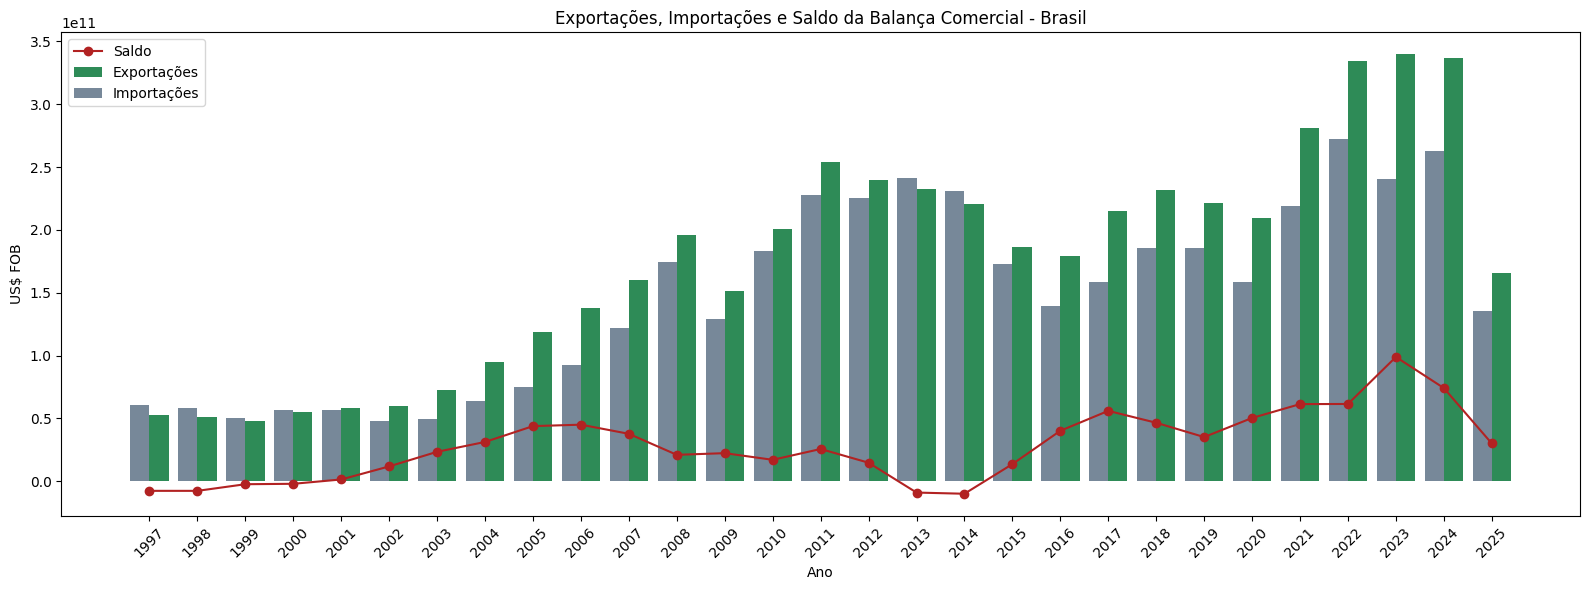

In [118]:
anos = data_total['Ano']
x = np.arange(len(anos))
width = 0.4
plt.figure(figsize=(16, 6))
plt.bar(x - width/2, data_total['Exportacoes'], width=width, label='Exportações', color='#2E8B57')
plt.bar(x + width/2, data_total['Importacoes'], width=width, label='Importações', color='#778899')
plt.plot(x, data_total['Saldo'], label='Saldo', color='#B22222', marker='o')
plt.xticks(x, anos, rotation=45)
plt.title('Exportações, Importações e Saldo da Balança Comercial - Brasil')
plt.xlabel('Ano')
plt.gca().invert_xaxis()
plt.ylabel('US$ FOB')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

## 2.2. Análise descritiva

Observa-se uma tendência histórica crescente tanto quanto ao volume total de exportações e importações quanto ao saldo positivo da balança comercial brasileira, com um primeiro pico em 2005 e posteriormente em 2017 e 2023.

Primeiramente, é importante contextualizar alguns períodos específicos na qual a conjuntura internacional impactou diretamente a balança comercial, sendo perceptível nestes queda simultânea de importações e de exportações: o de 2008 a 2012 corresponde ao pós-crise da bolha financeira nos Estados Unidos, a qual afetou a economia global e que pode explicar a forte retração tanto nas importações quanto nas exportações em 2009; o período entre 2013 e 2016, no qual o Brasil entrou em recessão econômica, cuja queda na produtividade e no poder aquisitivo levaram a progressivas quedas tanto no montante importado quanto exportado; e o ano de 2020, ápice dos efeitos da pandemia no comércio internacional, quando é possível verificar baixo volume tanto de importações quanto de exportações.

Além disso, é importante notar um pico no saldo da balança comercial no ano de 2023, causado principalmente pela redução das importações neste ano. O montante de exportações aumentou em 2022 e novamente em 2023, mas a principal mudança de 2022 para 2023 foi a queda considerável nas importações.

Diversos fatores podem causar a redução momentânea das importações, como por exemplo um momento de retração econômica, o que geraria menor aquisição de insumos, ou o aumento dos preços de insumos, que impactaria negativamente a produtividade nacional, podem acabar sendo mais determinantes para os movimentos de importações e exportações do que a taxa cambial.

Assim, impõem-se a verificação da variação ou manutenção de outros fatores que podem impactar a balança comercial brasileira, como preços e/ou quantidades de produtos exportados e importados.

É importante apontar que os períodos de saldo da balança comercial positivos ou negativos não correspondem necessaria e respectivamente aos períodos de expansão ou retração da economia brasileira como um todo. Nos anos de 2015 e 2016 houve retração econômica, o que gerou um baixo volume de importações no período, e ainda assim ocorreram superávits crescentes no saldo da balança comercial, com pico em 2017.

Momentos de aquecimento da economia tem como efeito colateral o aumento da quantidade da renda e, consequentemente, de moeda em circulação, o que em regra tende a acarretar no aumento das importações, o qual, se não for acompanhando de um aumento nas exportações, leva à redução no saldo da balança comercial. Em sentido oposto, momentos de retração econômica podem levar ao escoamento temporário de produtos para outros países, impactando positivamente o volume de exportações.

Demais conclusões dependem de outros dados a serem levantados, podendo implicar na possibilidade de que as flutuações no saldo da balança comercial ocorram muito mais por variações externas, como quedas no preço de commodities a nível mundial, do que internas. Também é necessário considerar o impacto da variação cambial nos dados obtivos.

Para dirimir essas questões, elaborei a seguir analises comparativas para a taxa cambial e posteriormente para os preços internacionais das principais commodities exportadas pelo Brasil.

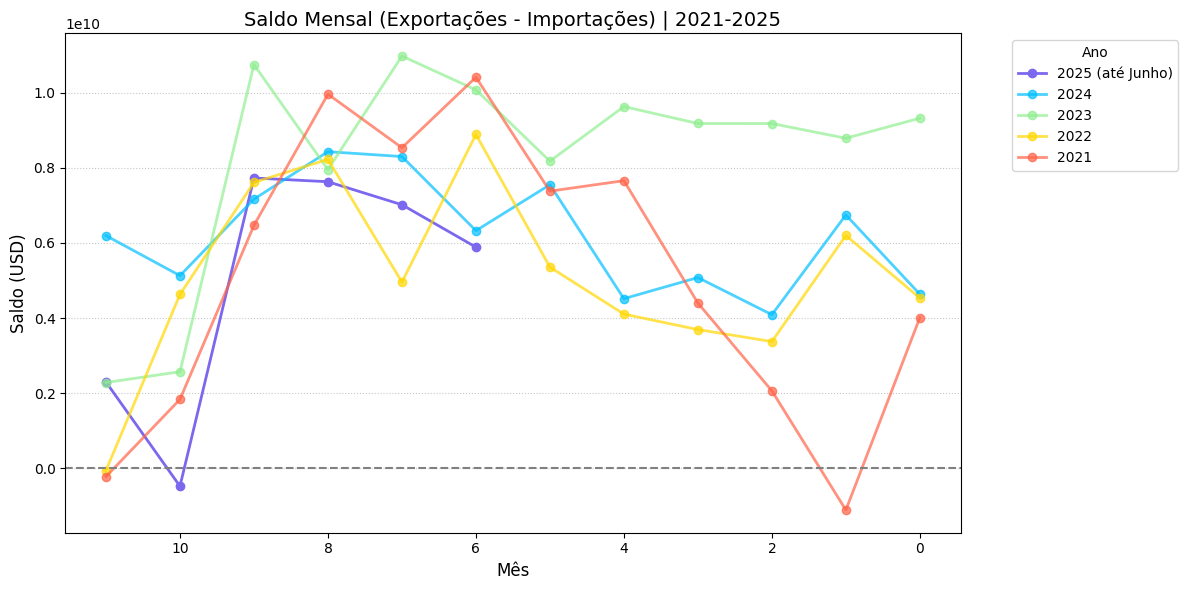

In [119]:
anos = ['2025', '2024', '2023', '2022', '2021']
cores_ano = {
    '2024': '#00BFFF',
    '2023': '#90EE90',
    '2022': '#FFD700',
    '2021': '#FF6347',
}

saldo = pd.DataFrame()

for ano in anos:
    saldo[ano] = DataExp[f'{ano}'] - DataImp[f'{ano}']

meses_ate_junho = [11, 10, 9, 8, 7, 6]
plt.figure(figsize=(12, 6))
for ano in anos:
    if ano == '2025':
        plt.plot(meses_ate_junho, saldo.loc[meses_ate_junho, ano],
                 label=f'{ano} (até Junho)',
                 marker='o',
                 linewidth=2,
                 color='#7B68EE')
    else:
        plt.plot(saldo.index, saldo[ano],
                 label=ano,
                 marker='o',
                 linewidth=2,
                 color=cores_ano[ano],
                 alpha=0.7)

plt.title('Saldo Mensal (Exportações - Importações) | 2021-2025', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Saldo (USD)', fontsize=12)
plt.axhline(y=0, color='gray', linestyle='--')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.gca().invert_xaxis()
plt.tight_layout()

plt.show()

O gráfico 2 apresenta a variação mensal do saldo da balança comercial, especificamente para o recorte dos anos 2021 ao 1º semestre de 2025. Percebe-se uma tendência geral de saldos maiores no 1º semestre e queda no 2º semestre em todos os anos.

O saldo da balança comercial de 2025 dá sinais de redução em seu montante mensal em comparação com os anos anteriores. É possível que esse cenário já seja um reflexo do novo cenário de aumento de barreiras tarifárias no mundo em geral, mas pode também estar atrelado à variação no preço de commodities ou instabilidade cambial.

Conforme minha análise avançar, pretendo incluir novos dados e informações a fim de verificar mensalmente a evolução da balança comercial brasileira, bem como visualizar os eventuais impactos decorrentes de acordos ou tarifas que porventura sejam aplicadas ao Brasil, principalmente os relacionados aos seus maiores parceiros econômicos, como Estados Unidos, China, Argentina e União Européia como um todo, e de eventuais alterações legislativas que impactem o comércio exterior.

# 3. Taxa de câmbio
## 3.1. Limpeza e tratamento dos dados

In [120]:
cambio = pd.read_csv('taxa-de-cmbio-nominal.csv', sep=';')
cambio

,DateTime,Taxa de câmbio nominal
0,2015-07-20,"3,2149"
1,2015-07-21,"3,1813"
2,2015-07-22,"3,2094"
3,2015-07-23,"3,285"
4,2015-07-24,"3,3254"
...,...,...
2504,2025-07-14,"5,5595"
2505,2025-07-15,"5,5576"
2506,2025-07-16,"5,5722"
2507,2025-07-17,"5,5737"


In [121]:
cambio = cambio.rename(columns={'Taxa de câmbio nominal': 'TaxaCambio'})
cambio = cambio.rename(columns={'DateTime': 'Data'})
cambio.head()

,Data,TaxaCambio
0,2015-07-20,"3,2149"
1,2015-07-21,"3,1813"
2,2015-07-22,"3,2094"
3,2015-07-23,"3,285"
4,2015-07-24,"3,3254"


In [122]:
cambio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Data        2509 non-null   object
 1   TaxaCambio  2509 non-null   object
dtypes: object(2)
memory usage: 39.3+ KB


In [123]:
cambio['TaxaCambio'] = cambio['TaxaCambio'].str.replace(',', '.').astype(float).round(2)
cambio.head()

,Data,TaxaCambio
0,2015-07-20,3.21
1,2015-07-21,3.18
2,2015-07-22,3.21
3,2015-07-23,3.28
4,2015-07-24,3.33


In [124]:
cambio['Data'] = cambio['Data'].astype(str).str.replace(r'[^\d-]', '', regex=True)
cambio.head()

,Data,TaxaCambio
0,2015-07-20,3.21
1,2015-07-21,3.18
2,2015-07-22,3.21
3,2015-07-23,3.28
4,2015-07-24,3.33


In [125]:
cambio['Data'].apply(type).value_counts()

,count
Data,
<class 'str'>,2509


In [126]:
cambio['Data'] = cambio['Data'].astype(str).str.strip()

In [127]:
cambio['Data'] = pd.to_datetime(cambio['Data'], format='%Y-%m-%d')
cambio.head()

,Data,TaxaCambio
0,2015-07-20,3.21
1,2015-07-21,3.18
2,2015-07-22,3.21
3,2015-07-23,3.28
4,2015-07-24,3.33


In [128]:
cambio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        2509 non-null   datetime64[ns]
 1   TaxaCambio  2509 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.3 KB


In [129]:
cambio['Ano'] = cambio['Data'].dt.year
cambio.head()

,Data,TaxaCambio,Ano
0,2015-07-20,3.21,2015
1,2015-07-21,3.18,2015
2,2015-07-22,3.21,2015
3,2015-07-23,3.28,2015
4,2015-07-24,3.33,2015


In [130]:
cambio_anual = cambio.drop(columns=['Data'])
cambio_anual

,TaxaCambio,Ano
0,3.21,2015
1,3.18,2015
2,3.21,2015
3,3.28,2015
4,3.33,2015
...,...,...
2504,5.56,2025
2505,5.56,2025
2506,5.57,2025
2507,5.57,2025


In [131]:
cambio_anual = cambio_anual.groupby('Ano').mean(numeric_only=True).round(2).reset_index()
cambio_anual

,Ano,TaxaCambio
0,2015,3.75
1,2016,3.48
2,2017,3.19
3,2018,3.66
4,2019,3.95
5,2020,5.16
6,2021,5.40
7,2022,5.17
8,2023,5.00
9,2024,5.39


In [132]:
data_total = data_total.sort_values('Ano')
cambio_anual = cambio_anual.sort_values('Ano')
comparacao = pd.merge(
    data_total[['Ano', 'Saldo']],
    cambio_anual[['Ano', 'TaxaCambio']],
    on='Ano'
)
comparacao.head()

,Ano,Saldo,TaxaCambio
0,2015,13678095986,3.75
1,2016,40204771561,3.48
2,2017,56036664350,3.19
3,2018,46567539897,3.66
4,2019,35198840067,3.95


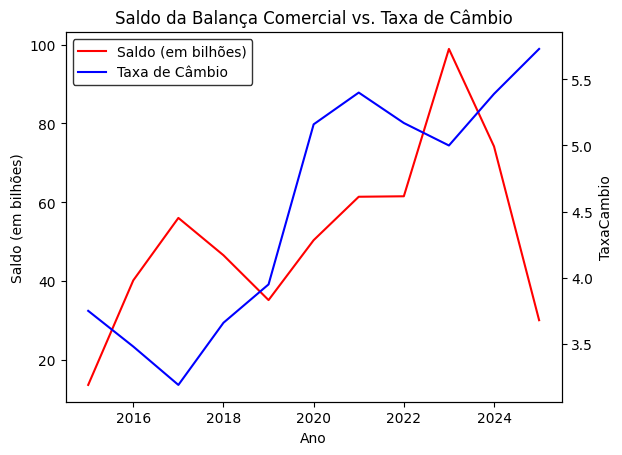

In [138]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Ano')
ax1.set_ylabel('Saldo (em bilhões)', color='black')
line1, = ax1.plot(comparacao['Ano'], comparacao['Saldo'], color='red', label='Saldo (em bilhões)')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_yticks([20e9, 40e9, 60e9, 80e9, 100e9])
ax1.set_yticklabels(["20", "40", "60", "80", "100"])

ax2 = ax1.twinx()
ax2.set_ylabel('TaxaCambio', color='black')
line2, = ax2.plot(comparacao['Ano'], comparacao['TaxaCambio'], color='blue', label='Taxa de Câmbio')
ax2.tick_params(axis='y', labelcolor='black')

plt.legend(handles=[line1, line2], loc='upper left', frameon=True, edgecolor='black', facecolor='white')
plt.title('Saldo da Balança Comercial vs. Taxa de Câmbio')
plt.show()

## 3.2. Análise descritiva

O gráfico 3 apresenta a comparação entre o histórico do saldo da balança comercial com o valor nominal da taxa de câmbio ao longo dos anos 2015 a 2024. É possível perceber curtos períodos de correlação inversamente proporcional da flutuação da taxa de câmbio e do saldo da balança comercial, e um período de correlação proporcional.

Quanto menor o valor nominal da taxa de câmbio no gráfico, ou seja, quanto mais o valor nominal do real se aproxima de 1:1 com o dólar, mais valorizada a moeda nacional está. Quanto maior o valor nominal, assim mais distante da paridade com o dólar, mais desvalorizada a moeda está.

Via de regra a teoria econômica dita que quando há valorização cambial há uma tendência de aumento das importações e, consequentemente, redução no saldo da balança comercial. Quando há desvalorização cambial há uma tendência de escoamento de produtos, aumentando as exportações e o saldo da balança comercial.

Percebemos, no entanto, claros momentos em que ocorre o oposto: de 2016 a 2017 percebemos valorização cambial, seguida de desvalorização de 2017 a 2020; novamente entre 2022 e 2024 temos novo momento de movimentos opostos da taxa de câmbio e do saldo da balança comercial.

Entre 2019 e 2020 a relação clássica entre a taxa de câmbio e o saldo da balança comercial fica evidente, decorrente de possível estabilização após momentos como a relação de oposição observada entre 2016 e 2018. Observando o gráfico 1, verificamos que nesse mesmo período temos aumento simultâneo e proporcional tanto das importações quanto das exportações.

É possível que do aumento nas exportações ocorra o aumento de entrada de dólares e, consequentemente, valorização cambial, gerando assim causalidade reversa. Como o Brasil é um país com grande proporção de commodities entre os seus principais produtos de exportação, períodos com alta nos preços internacionais de commodities podem ajudar a explicar saldos positivos crescentes na balaça comercial mesmo em momentos de valorização cambial.

Segundo consta do site "ComexVis" do Ministério de Desenvolvimento, Indústria e Comércio, os principais produtos de exportação do Brasil atualmente são a soja, óleos brutos de petróleo, minérios de ferro, café não torrado e carne bovina, commodities que tem seu preço internacional calculado em dólares.

Para permitir a visualização do impacto da variação dos preços internacionais na balança comercial brasileira, inicialmente é necessário tratar as informações e posteriormente elaborar os gráficos correspondentes.

# 4. Commodities

A fim de observar o impacto da variação de preços de bens na balança comercial brasileira, foram selecionadas para análise as commodities e produtos de maior impacto nas exportações, tais como soja, minério de ferro, carne bovina, açúcar, petróleo bruto e café.
Na ótica das importações, para os objetivos do presente trabalho optei por focar nos fertilizantes, combustíveis a base de petróleo/minérios betuminosos, veículos para passageiros, motores e válvulas/componentes eletrônicos, os principais produtos importados pelo Brasil.

## 4.1. Limpeza e tratamento dos dados - exportações

In [139]:
OMC_dados = pd.read_excel('CMO-Historical-Data-Annual.xlsx', sheet_name='Annual Prices (Nominal)', header=None)
OMC_dados

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,World Bank Commodity Price Data (The Pink Sheet),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"annual prices, 1960 to present, nominal US dol...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(annual series are available in nominal and re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Updated on May 02, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2020,41.257778,42.3,42.165,39.308333,60.785,65.656667,2.014375,3.242024,8.313348,...,1703.986667,108.918333,6173.770833,1824.880833,17124.599167,13787.256667,2266.449167,1770.254167,883.393333,20.536583
69,2021,69.070556,70.443333,68.805,67.963333,138.05,119.840229,3.851408,16.115878,10.761649,...,2472.848333,161.71,9317.05,2200.365,32384.148333,18464.965833,3002.520833,1799.629167,1091.133333,25.164583
70,2022,97.101389,99.824167,97.049167,94.430833,344.893333,240.556977,6.368317,40.340157,18.426925,...,2705.019167,121.300833,8822.365833,2150.5975,31335.405,25833.725,3481.378333,1800.6025,961.715833,21.794417
71,2023,80.755694,82.61625,81.981667,77.669167,172.779167,119.105758,2.537808,13.113403,14.387108,...,2255.739167,120.574167,8490.290833,2135.7975,25938.113333,21521.115,2652.604167,1942.665833,966.355,23.398583


In [140]:
OMC_dados.columns = OMC_dados.iloc[6]
OMC_dados = OMC_dados.iloc[8:].reset_index(drop=True)
OMC_dados.head()

6,NaN,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South Afican","Natural gas, US","Natural gas, Europe","Liquefied natural gas, Japan",...,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
0,1960,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,678.755833,198.85,2196.733333,1631,246.191667,35.27,83.5,0.9137
1,1961,1.57,1.57,1.57,…,…,…,0.15,0.404774,…,...,511.471832,11.02,633.084167,176.975,2449.891667,1711,214.308333,35.25,83.5,0.924442
2,1962,1.52,1.52,1.52,…,…,…,0.16,0.404774,…,...,498.060392,11.01,645.143333,155.283333,2471.383333,1761,185.925,35.23,83.5,1.083725
3,1963,1.5,1.5,1.5,…,…,…,0.16,0.391351,…,...,498.795265,11.02,645.950833,174.808333,2507.733333,1741.666667,211.508333,35.09,80.930833,1.279108
4,1964,1.45,1.45,1.45,…,…,…,0.15,0.38415,…,...,525.985631,10.24,969.753333,277.883333,3412.741667,1741.666667,326.491667,35.1,88.480833,1.293


In [141]:
colunas = list(OMC_dados.columns)
colunas[0] = 'Ano'
OMC_dados.columns = colunas
OMC_dados

,Ano,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South Afican","Natural gas, US","Natural gas, Europe","Liquefied natural gas, Japan",...,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
0,1960,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,678.755833,198.85,2196.733333,1631,246.191667,35.27,83.5,0.9137
1,1961,1.57,1.57,1.57,…,…,…,0.15,0.404774,…,...,511.471832,11.02,633.084167,176.975,2449.891667,1711,214.308333,35.25,83.5,0.924442
2,1962,1.52,1.52,1.52,…,…,…,0.16,0.404774,…,...,498.060392,11.01,645.143333,155.283333,2471.383333,1761,185.925,35.23,83.5,1.083725
3,1963,1.5,1.5,1.5,…,…,…,0.16,0.391351,…,...,498.795265,11.02,645.950833,174.808333,2507.733333,1741.666667,211.508333,35.09,80.930833,1.279108
4,1964,1.45,1.45,1.45,…,…,…,0.15,0.38415,…,...,525.985631,10.24,969.753333,277.883333,3412.741667,1741.666667,326.491667,35.1,88.480833,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020,41.257778,42.3,42.165,39.308333,60.785,65.656667,2.014375,3.242024,8.313348,...,1703.986667,108.918333,6173.770833,1824.880833,17124.599167,13787.256667,2266.449167,1770.254167,883.393333,20.536583
61,2021,69.070556,70.443333,68.805,67.963333,138.05,119.840229,3.851408,16.115878,10.761649,...,2472.848333,161.71,9317.05,2200.365,32384.148333,18464.965833,3002.520833,1799.629167,1091.133333,25.164583
62,2022,97.101389,99.824167,97.049167,94.430833,344.893333,240.556977,6.368317,40.340157,18.426925,...,2705.019167,121.300833,8822.365833,2150.5975,31335.405,25833.725,3481.378333,1800.6025,961.715833,21.794417
63,2023,80.755694,82.61625,81.981667,77.669167,172.779167,119.105758,2.537808,13.113403,14.387108,...,2255.739167,120.574167,8490.290833,2135.7975,25938.113333,21521.115,2652.604167,1942.665833,966.355,23.398583


In [142]:
OMC_dados.columns

Index(['Ano', 'Crude oil, average', 'Crude oil, Brent', 'Crude oil, Dubai',
       'Crude oil, WTI', 'Coal, Australian', 'Coal, South Afican',
       'Natural gas, US', 'Natural gas, Europe',
       'Liquefied natural gas, Japan', 'Natural gas index', 'Cocoa',
       'Coffee, Arabica', 'Coffee, Robusta', 'Tea, avg 3 auctions',
       'Tea, Colombo', 'Tea, Kolkata', 'Tea, Mombasa', 'Coconut oil',
       'Groundnuts', 'Fish meal', 'Groundnut oil', 'Palm oil',
       'Palm kernel oil', 'Soybeans', 'Soybean oil', 'Soybean meal', 'Barley',
       'Maize', 'Sorghum', 'Rice, Thai 5% ', 'Rice, Thai 25% ',
       'Rice, Thai A.1', 'Rice, Viet Namese 5%', 'Wheat, US SRW',
       'Wheat, US HRW', 'Banana, Europe', 'Banana, US', 'Orange', 'Beef',
       'Chicken', 'Lamb **', 'Shrimps, Mexican', 'Sugar, EU', 'Sugar, US',
       'Sugar, world', 'Tobacco, US import u.v.', 'Logs, Cameroon',
       'Logs, Malaysian', 'Sawnwood, Cameroon', 'Sawnwood, Malaysian',
       'Plywood', 'Cotton, A Index', 'Rub

In [143]:
commodities_exp = OMC_dados[['Ano', 'Soybeans', 'Crude oil, Brent', 'Iron ore, cfr spot', 'Sugar, world', 'Beef', 'Coffee, Arabica']]
commodities_exp.head()

,Ano,Soybeans,"Crude oil, Brent","Iron ore, cfr spot","Sugar, world",Beef,"Coffee, Arabica"
0,1960,91.833333,1.63,11.42,0.066208,0.736533,0.923517
1,1961,109.333333,1.57,11.02,0.05945,0.68195,0.895542
2,1962,100.54,1.52,11.01,0.061683,0.714125,0.832592
3,1963,110.093333,1.5,11.02,0.183233,0.666342,0.805742
4,1964,110.505833,1.45,10.24,0.126325,0.840883,1.009758


In [144]:
commodities_exp = commodities_exp.rename(columns={'Soybeans': 'Soja'})
commodities_exp = commodities_exp.rename(columns={'Crude oil, Brent': 'Petróleo bruto'})
commodities_exp = commodities_exp.rename(columns={'Iron ore, cfr spot': 'Minério de ferro'})
commodities_exp = commodities_exp.rename(columns={'Sugar, world': 'Açúcar'})
commodities_exp = commodities_exp.rename(columns={'Beef': 'Carne bovina'})
commodities_exp = commodities_exp.rename(columns={'Coffee, Arabica': 'Café'})
commodities_exp.head()

,Ano,Soja,Petróleo bruto,Minério de ferro,Açúcar,Carne bovina,Café
0,1960,91.833333,1.63,11.42,0.066208,0.736533,0.923517
1,1961,109.333333,1.57,11.02,0.05945,0.68195,0.895542
2,1962,100.54,1.52,11.01,0.061683,0.714125,0.832592
3,1963,110.093333,1.5,11.02,0.183233,0.666342,0.805742
4,1964,110.505833,1.45,10.24,0.126325,0.840883,1.009758


In [145]:
commodities_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Ano               65 non-null     object
 1   Soja              65 non-null     object
 2   Petróleo bruto    65 non-null     object
 3   Minério de ferro  65 non-null     object
 4   Açúcar            65 non-null     object
 5   Carne bovina      65 non-null     object
 6   Café              65 non-null     object
dtypes: object(7)
memory usage: 3.7+ KB


In [146]:
commodities_exp['Ano'] = commodities_exp['Ano'].astype(int)
commodities_exp['Soja'] = commodities_exp['Soja'].astype(float).round(2)
commodities_exp['Petróleo bruto'] = commodities_exp['Petróleo bruto'].astype(float).round(2)
commodities_exp['Minério de ferro'] = commodities_exp['Minério de ferro'].astype(float).round(2)
commodities_exp['Açúcar'] = commodities_exp['Açúcar'].astype(float).round(2)
commodities_exp['Carne bovina'] = commodities_exp['Carne bovina'].astype(float).round(2)
commodities_exp['Café'] = commodities_exp['Café'].astype(float).round(2)
commodities_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ano               65 non-null     int64  
 1   Soja              65 non-null     float64
 2   Petróleo bruto    65 non-null     float64
 3   Minério de ferro  65 non-null     float64
 4   Açúcar            65 non-null     float64
 5   Carne bovina      65 non-null     float64
 6   Café              65 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 3.7 KB


In [147]:
commodities_2015 = commodities_exp[commodities_exp['Ano'] >= 2015].reset_index(drop=True)
commodities_2015

,Ano,Soja,Petróleo bruto,Minério de ferro,Açúcar,Carne bovina,Café
0,2015,392.12,52.37,55.85,0.30,4.56,3.53
1,2016,405.45,44.05,58.42,0.40,4.06,3.61
2,2017,393.38,54.39,71.76,0.35,4.39,3.32
3,2018,394.42,71.07,69.75,0.28,4.20,2.93
4,2019,368.95,64.03,93.85,0.28,4.76,2.88
5,2020,406.64,42.30,108.92,0.28,4.67,3.32
6,2021,583.32,70.44,161.71,0.39,5.34,4.51
7,2022,675.40,99.82,121.30,0.41,5.62,5.63
8,2023,597.90,82.62,120.57,0.52,4.90,4.54
9,2024,462.49,80.70,109.40,0.45,5.93,5.62


## 4.2. Limpeza e tratamento dos dados - importações

In [148]:
bens_exportados = commodities_2015.copy()
for col in bens_exportados.columns:
    if col != 'Ano':
        base = bens_exportados.loc[0, col]
        bens_exportados[col] = bens_exportados[col] / base * 100

In [54]:
fertilizantes = pd.read_csv('dados_serie_historica_fertilizantes.csv', sep=';')
fertilizantes.head()

,periodo,vl_fob,kg_liquido,preco
0,2015,6567322323,19788794909,"0,3319"
1,2016,5975491867,23792460652,"0,2512"
2,2017,7303842245,28579280352,"0,2556"
3,2018,8593832640,29521767943,"0,2911"
4,2019,9121411232,31122627518,"0,2931"


In [55]:
fertilizantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   periodo     11 non-null     int64 
 1   vl_fob      11 non-null     int64 
 2   kg_liquido  11 non-null     int64 
 3   preco       11 non-null     object
dtypes: int64(3), object(1)
memory usage: 484.0+ bytes


In [56]:
fertilizantes['preco'] = fertilizantes['preco'].str.replace(',', '.').astype(float).round(2)
fertilizantes.head()

,periodo,vl_fob,kg_liquido,preco
0,2015,6567322323,19788794909,0.33
1,2016,5975491867,23792460652,0.25
2,2017,7303842245,28579280352,0.26
3,2018,8593832640,29521767943,0.29
4,2019,9121411232,31122627518,0.29


In [57]:
fertilizantes = fertilizantes.rename(columns={'preco': 'Preço fertilizantes'})
fertilizantes.head()

,periodo,vl_fob,kg_liquido,Preço fertilizantes
0,2015,6567322323,19788794909,0.33
1,2016,5975491867,23792460652,0.25
2,2017,7303842245,28579280352,0.26
3,2018,8593832640,29521767943,0.29
4,2019,9121411232,31122627518,0.29


In [58]:
veiculos = pd.read_csv('dados_serie_historica_veículos.csv', sep=';')
veiculos.head()

,periodo,vl_fob,kg_liquido,preco
0,2015,5019477811,429832183,"11,6778"
1,2016,2849355307,243851646,"11,6848"
2,2017,2956681060,237400756,"12,4544"
3,2018,4190779465,338875614,"12,3667"
4,2019,3320226518,259649319,"12,7873"


In [59]:
veiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   periodo     11 non-null     int64 
 1   vl_fob      11 non-null     int64 
 2   kg_liquido  11 non-null     int64 
 3   preco       11 non-null     object
dtypes: int64(3), object(1)
memory usage: 484.0+ bytes


In [60]:
veiculos['preco'] = veiculos['preco'].str.replace(',', '.').astype(float).round(2)
veiculos.head()

,periodo,vl_fob,kg_liquido,preco
0,2015,5019477811,429832183,11.68
1,2016,2849355307,243851646,11.68
2,2017,2956681060,237400756,12.45
3,2018,4190779465,338875614,12.37
4,2019,3320226518,259649319,12.79


In [61]:
veiculos = veiculos.rename(columns={'preco': 'Preço veículos'})
veiculos.head()

,periodo,vl_fob,kg_liquido,Preço veículos
0,2015,5019477811,429832183,11.68
1,2016,2849355307,243851646,11.68
2,2017,2956681060,237400756,12.45
3,2018,4190779465,338875614,12.37
4,2019,3320226518,259649319,12.79


In [62]:
petroleo = pd.read_csv('dados_serie_historica_petróleo combustível.csv', sep=';')
petroleo.head()

,periodo,vl_fob,kg_liquido,preco
0,2015,8628428306,15134771151,"0,5701"
1,2016,7306380207,17049877755,"0,4285"
2,2017,11848596692,23425572253,"0,5058"
3,2018,12896096737,19867075270,"0,6491"
4,2019,12983765571,21881039113,"0,5934"


In [63]:
petroleo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   periodo     11 non-null     int64 
 1   vl_fob      11 non-null     int64 
 2   kg_liquido  11 non-null     int64 
 3   preco       11 non-null     object
dtypes: int64(3), object(1)
memory usage: 484.0+ bytes


In [64]:
petroleo['preco'] = petroleo['preco'].str.replace(',', '.').astype(float).round(2)
petroleo.head()

,periodo,vl_fob,kg_liquido,preco
0,2015,8628428306,15134771151,0.57
1,2016,7306380207,17049877755,0.43
2,2017,11848596692,23425572253,0.51
3,2018,12896096737,19867075270,0.65
4,2019,12983765571,21881039113,0.59


In [65]:
petroleo = petroleo.rename(columns={'preco': 'Preço petroleo'})
petroleo.head()

,periodo,vl_fob,kg_liquido,Preço petroleo
0,2015,8628428306,15134771151,0.57
1,2016,7306380207,17049877755,0.43
2,2017,11848596692,23425572253,0.51
3,2018,12896096737,19867075270,0.65
4,2019,12983765571,21881039113,0.59


In [66]:
motores = pd.read_csv('dados_serie_historica_motores.csv', sep=';')
motores.head()

,periodo,vl_fob,kg_liquido,preco
0,2015,2723636522,1464022,"1860,3795"
1,2016,2737025928,890734,"3072,7759"
2,2017,3127319108,1194162,"2618,8399"
3,2018,3478766815,1091647,"3186,714"
4,2019,4282647433,1544561,"2772,7279"


In [67]:
motores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   periodo     11 non-null     int64 
 1   vl_fob      11 non-null     int64 
 2   kg_liquido  11 non-null     int64 
 3   preco       11 non-null     object
dtypes: int64(3), object(1)
memory usage: 484.0+ bytes


In [68]:
motores['preco'] = motores['preco'].str.replace(',', '.').astype(float).round(2)
motores.head()

,periodo,vl_fob,kg_liquido,preco
0,2015,2723636522,1464022,1860.38
1,2016,2737025928,890734,3072.78
2,2017,3127319108,1194162,2618.84
3,2018,3478766815,1091647,3186.71
4,2019,4282647433,1544561,2772.73


In [69]:
motores = motores.rename(columns={'preco': 'Preço motores'})
motores.head()

,periodo,vl_fob,kg_liquido,Preço motores
0,2015,2723636522,1464022,1860.38
1,2016,2737025928,890734,3072.78
2,2017,3127319108,1194162,2618.84
3,2018,3478766815,1091647,3186.71
4,2019,4282647433,1544561,2772.73


In [70]:
valvulas = pd.read_csv('dados_serie_historica_valvulas.csv', sep=';')
valvulas.head()

,periodo,vl_fob,kg_liquido,preco
0,2015,3393457160,12109860,"280,2227"
1,2016,3432132519,50137038,"68,455"
2,2017,5122154190,81530664,"62,8249"
3,2018,5734572746,132873579,"43,1581"
4,2019,5750930088,277244185,"20,7432"


In [71]:
valvulas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   periodo     11 non-null     int64 
 1   vl_fob      11 non-null     int64 
 2   kg_liquido  11 non-null     int64 
 3   preco       11 non-null     object
dtypes: int64(3), object(1)
memory usage: 484.0+ bytes


In [72]:
valvulas['preco'] = valvulas['preco'].str.replace(',', '.').astype(float).round(2)
valvulas.head()

,periodo,vl_fob,kg_liquido,preco
0,2015,3393457160,12109860,280.22
1,2016,3432132519,50137038,68.46
2,2017,5122154190,81530664,62.82
3,2018,5734572746,132873579,43.16
4,2019,5750930088,277244185,20.74


In [73]:
valvulas = valvulas.rename(columns={'preco': 'Preço valvulas'})
valvulas.head()

,periodo,vl_fob,kg_liquido,Preço valvulas
0,2015,3393457160,12109860,280.22
1,2016,3432132519,50137038,68.46
2,2017,5122154190,81530664,62.82
3,2018,5734572746,132873579,43.16
4,2019,5750930088,277244185,20.74


In [80]:
fertilizantes_p = fertilizantes[['periodo', 'Preço fertilizantes']]
motores_p      = motores[['periodo', 'Preço motores']]
valvulas_p     = valvulas[['periodo', 'Preço valvulas']]
veiculos_p     = veiculos[['periodo', 'Preço veículos']]
petroleo_p     = petroleo[['periodo', 'Preço petroleo']]

bens_importados = fertilizantes_p.merge(motores_p, on='periodo') \
                          .merge(valvulas_p, on='periodo') \
                          .merge(veiculos_p, on='periodo') \
                          .merge(petroleo_p, on='periodo')

bens_importados = bens_importados.sort_values('periodo').reset_index(drop=True)

bens_importados.head()

,periodo,Preço fertilizantes,Preço motores,Preço valvulas,Preço veículos,Preço petroleo
0,2015,0.33,1860.38,280.22,11.68,0.57
1,2016,0.25,3072.78,68.46,11.68,0.43
2,2017,0.26,2618.84,62.82,12.45,0.51
3,2018,0.29,3186.71,43.16,12.37,0.65
4,2019,0.29,2772.73,20.74,12.79,0.59


In [81]:
bens_importados_escala = bens_importados.copy()
for col in bens_importados_escala.columns:
    if col != 'periodo':
        base = bens_importados_escala.loc[0, col]
        bens_importados_escala[col] = bens_importados_escala[col] / base * 100

## 4.2. Visualização dos dados

Ante aos bens analisados terem escalas de valores muito diferentes entre si, a visualização de todos os bens em um único gráfico dificultaria a observação da variação dos bens com valores menores, além de ficar poluído visualmente.

Por essa razão, e por não haver necessidade de comparação direta entre os valores de cada bem, sendo o foco a variação do preço de cada um individualmente ao longo do tempo, optei por dividir os bens em uma maior quantidade de gráficos.

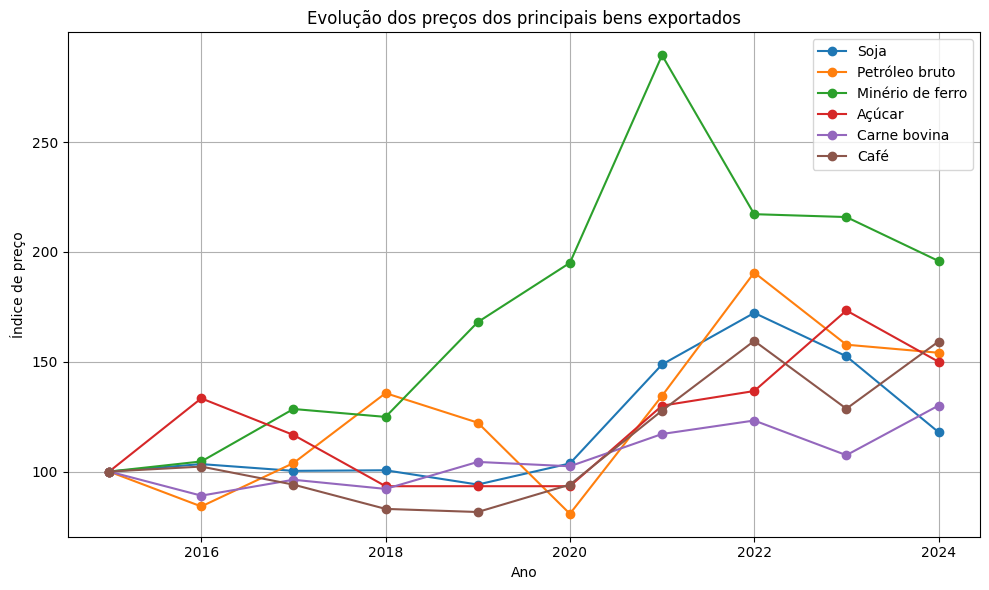

In [149]:
plt.figure(figsize=(10,6))
for col in bens_exportados.columns:
    if col == 'Ano':
        continue
    plt.plot(bens_exportados['Ano'], bens_exportados[col], marker='o', label=col)

plt.xlabel('Ano')
plt.ylabel('Índice de preço')
plt.title('Evolução dos preços dos principais bens exportados')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

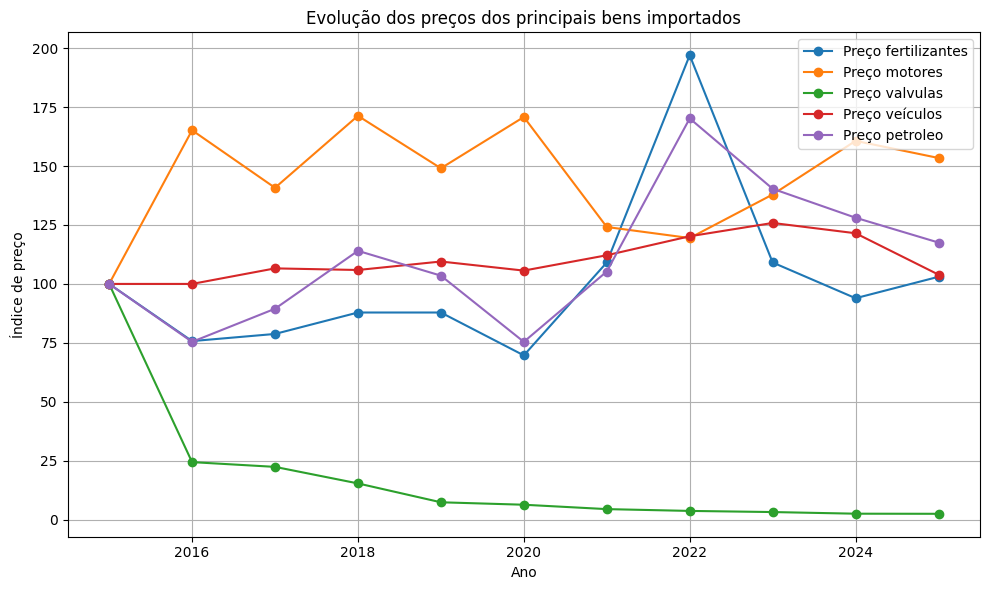

In [104]:
plt.figure(figsize=(10,6))
for col in bens_importados_escala.columns:
    if col == 'periodo':
        continue
    plt.plot(bens_importados_escala['periodo'], bens_importados_escala[col], marker='o', label=col)

plt.xlabel('Ano')
plt.ylabel('Índice de preço')
plt.title('Evolução dos preços dos principais bens importados')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Para compreender se de fato a variação no preço de bens importados foi determinante para a queda no montante de importações, em particular a de fertilizantes, dada a sua grande variação em 2022 e em 2023, optei por realizar uma decomposição preço-quantidade.
Essa análise permite separar e quantificar o efeito individual da variação do preço unitário e da quantidade importada sobre o valor agregado, facilitando a identificação do principal motor da mudança observada.

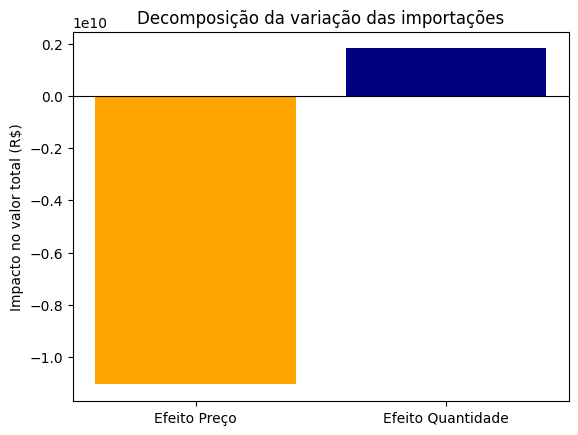

In [101]:
def decompose(fertilizantes, ano0, ano1):
    d0 = fertilizantes[fertilizantes['periodo'] == ano0].iloc[0]
    d1 = fertilizantes[fertilizantes['periodo'] == ano1].iloc[0]

    price_effect = (d1['Preço fertilizantes'] - d0['Preço fertilizantes']) * d0['kg_liquido']
    quantity_effect = d0['Preço fertilizantes'] * (d1['kg_liquido'] - d0['kg_liquido'])
    total_change = d1['vl_fob'] - d0['vl_fob']

    return {
        'price_effect': price_effect,
        'quantity_effect': quantity_effect,
        'total_change': total_change
    }

resultado = decompose(fertilizantes, 2022, 2023)

price_effect = resultado['price_effect']
quantity_effect = resultado['quantity_effect']

labels = ['Efeito Preço', 'Efeito Quantidade']
values = [price_effect, quantity_effect]

plt.bar(labels, values, color=['orange', 'navy'])
plt.title('Decomposição da variação das importações')
plt.ylabel('Impacto no valor total (R$)')
plt.axhline(0, color='black', linewidth=0.8)
plt.show()

O gráfico acima mostra que a queda do preço unitário do fertilizante entre 2022 e 2023 foi o principal fator responsável pela significativa redução no valor total das importações nesse período. Ao mesmo tempo, observou-se um pequeno aumento na quantidade importada, indicando que a demanda pelo produto apresenta baixa elasticidade em relação ao preço.

## 4.3. Análise descritiva

Em vista dos os gráficos elaborados fica mais fácil visualizar a correlação entre a variação nos preços das commodities e o saldo da balança comercial, podendo ser um fator mais determinante que a variação cambial em determinados momentos. Ante às informações já previamente mencionadas, impõem-se a análise mais detalhada de duas situações bem específicas: o período de 2015 a 2017 e os anos de 2022 e 2023.

### Período de 2015 a 2017

Neste período podemos observar uma ligeira redução nas exportações e uma redução um pouco mais substancial nas importações, seguida de um aumento de ambos em 2017. No mesmo período observamos queda nos preços de commodities como carne bovina e petróleo bruto, mas aumento nos preços da soja, minério de ferro e açúcar.

Esses movimentos coexistem com um episódio recessivo na economia doméstica, que pode ter reduzido a demanda por importações de bens intermediários e de consumo. Em termos econômicos, essa combinação sugere que a composição do comércio (mix de produtos) e as variações de preço foram fatores centrais: aumentos de preço dos produtos exportados elevam receitas de exportação mesmo que volumes se mantenham ou se ajustem com defasagem; quedas de preço reduzem receita, mesmo que volumes não caiam imediatamente.

A recuperação das exportações em 2017 resulta tanto da própria recuperação econômica quanto da alta de preços da soja, em 2016, e minério de ferro e carne bovina, em 2017. Recorda-se que a soja é um bem com baixa elasticidade-preço no curto prazo, ou seja, altas de preços tendem a gerar aumento da quantidade ofertada apenas no longo prazo, implicando na alta de preços de 2016 ter gerado efeitos na safra de 2017.

Cabe apontar também a possibilidade de que outros fatores tenham ajudado a evitar uma queda maior no montante de exportações, como o Regime Especial de Reintegra, programa de incentivo às exportações criado em 2011 mas que teve, por meio do Decreto nº 8.415/2015, sua alíquota aumentada a partir de janeiro de 2016 para 3% da receita de exportação, valores esses devolvidos como crédito tributário aos exportadores industriais, estimulando assim as exportações.

### 2022-2024

É possível notar um aumento nas exportações de 2022 para 2023, mas o que chama mais atenção nesse período foi a grande queda no montante total de importações, o que resultou no ano de 2023 como o de maior superávit na balança comercial brasileira na história, no montante de aproximadamente US$ 98,8 bilhões, segundo informações que constam do site do IPEA.

Observando os gráficos é possível notar que o preço dos fertilizantes importados pelo Brasil teve alta considerável em 2022, seguido de forte queda em 2023. Essa grande variação ocorreu exatamente no período após o início da guerra, em fevereiro de 2022, entre Rússia e Ucrânia, sendo o primeiro o maior exportador de fertilizantes do mundo e de onde os produtores brasileiros adquirem a maioria de seus fertilizantes.

Como os produtores não podem prescindir de adquirir os fertilizantes, a manutenção do volume exportado faz o valor total de produtos importados aumentar. Em sentido oposto, a queda no preço dos fertilizantes em 2023 tende a representar uma diminuição no valor total de produtos importados.

O gráfico de dispersão auxilia na visualização do efeito preço e como o aumento da quantidade importada foi relativamente pequeno, levando a uma queda no valor total gasto com a importação de fertilizantes em 2023 quando comparado com 2022.

O choque de oferta internacional de fertilizantes após o início da guerra entre Rússia e Ucrânia elevou fortemente os preços desses insumos em 2022. Como a demanda doméstica por fertilizantes é, no curto prazo, relativamente inelástica — produtores agrícolas não podem simplesmente dispensá-los sem perda significativa de produtividade — o aumento de preços elevou o montante em US$ das importações de fertilizantes mesmo que as quantidades compradas não tenham crescido proporcionalmente. A subsequente queda de preços dos fertilizantes em 2023 tende, por sua vez, a reduzir a fatura das importações, contribuindo para a melhoria do saldo comercial.

No mesmo período commodities como a soja, carne bovina, café e petróleo bruto tiveram alta, principalmente em 2022, o que ajudou a impulsionar a oferta, seguido de normalização dos preços em 2023, ano no qual o Brasil teve recorde de safra de grãos, aumentando o montante total exportado. Parte desse efeito reverteu em 2023 com a normalização de preços, mas a combinação de estoques e safras fez com que o valor exportado permanecesse elevado.

Em termos agregados, o superávit recorde de 2023 parece decorrer da conjunção de (i) manutenção de volumes exportados (e preços ainda favoráveis em termos médios), com (ii) queda do preço de insumos importados (fertilizantes) que reduziu o valor total das importações. Para transformar essa explicação em evidência robusta recomenda-se decompor a variação do valor comercial em efeitos de preço e de quantidade por produto (ver sugestões abaixo) e apresentar séries de preço unitário e de quantidades para as principais posições.

# 5. Conclusão

Finalizada a análise, passamos à conclusões retomando as questões levantadas no início do trabalho.

Primeiro, verificamos que a balança comercial brasileira é majoritariamente superavitária desde 2021, com exceções apenas nos anos de 2013 e 2014, dada a simultanea queda nas exportações e aumento das importações. Isso confere ao Brasil uma boa estabilidade e serve para manter boa quantidade de reservas internacionais. Caso a balança comercial fosse deficitária, o Brasil teria que constantemente financiar os déficits com reservas internacionais ou, caso insuficientes, com recursos próprios, o que não é necessário.

Quanto à variação da taxa cambial, observamos momentos em que a variação cambial e o saldo da balança comercial seguem exatamente o que dita a teoria econômica. Quando há valorização cambial há uma tendência de aumento das importações e, consequentemente, redução no saldo da balança comercial, e quando há desvalorização cambial ocorre aumento das exportações e tendência a superávit no saldo da balança comercial.
Contudo, durante os anos avaliados foi possível observar claramente períodos em que a taxa cambial não é o fator determinante para saldo da balança comercial ser superavitário ou deficitário.

Avaliamos assim dois principais períodos excepcionais: o de 2015 a 2017 e o de 2022 a 2023.
Nestes, fatores como a variação dos preços de produtos importados e exportados e a baixa elasticidade-preço dos principais produtos exportados pelo Brasil acabaram sendo determinantes para explicar a variação do saldo da balança comercial. Além disso houve a análise de outras questões que impactaram direta ou indiretamente a balança comercial, tanto externos, como a Guerra Russo-Ucraniana, que impactou preços de bens adquiridos e vendidos por produtores brasileiros em 2022-2023; quanto fatores internos como a própria legislação brasileira, que pode servir para estimular ou desestimular as exportações e importações, como ocorreu em 2015-2017.

Por fim, importa asseverar que a avaliação da balança comercial a partir de uma base histórica a partir de dados e informações técnicas pertinentes traz maior rigor e precisão à análise do comércio internacional. Padrões históricos podem ajudar na previsibilidade de fluxos de comércio de bens e serviços internacionais, podendo auxiliar na tomada de decisões sobre políticas públicas, negócios e investimentos.

Compreender a multiplicidade de fatores que impactam a balança comercial é um ponto de partida essencial para uma visão mais clara sobre como produtores, investidores e o próprio Estado poderão atuar no mercado internacional, principalmente em um mundo onde disputas geopolíticas tendem a tornar o fluxo de comércio cada vez mais instável.


Observação final: Esta análise tem caráter exploratório e buscou relacionar variações nos preços de commodities e fertilizantes com o desempenho da balança comercial brasileira em períodos recentes. Embora os dados apontem padrões relevantes e possíveis fatores explicativos, não se esgota aqui a investigação sobre a influência de elementos específicos, como o impacto isolado de políticas de incentivo às exportações (a exemplo do Reintegra), mudanças tributárias ou condições de mercado internacionais.
Estudos adicionais, com metodologias econométricas mais robustas e séries temporais mais extensas, poderiam contribuir para estimar de forma mais precisa a magnitude desses efeitos, especialmente no contexto das interações entre comércio internacional, política econômica e conjuntura geopolítica.

# 6. Referências bibliográficas

BRASIL. Banco Central do Brasil. Séries temporais - taxa de câmbio. Disponível em: <https://www.bcb.gov.br/>. Acesso em: 15 de julho de 2025.

BRASIL. Ministério do Desenvolvimento, Indústria, Comércio e Serviços. COMEX STAT - Estatísticas de Comércio Exterior. Disponível em: <https://comexstat.mdic.gov.br/>. Acesso em: 20 de julho de 2025.

WORLD TRADE ORGANIZATION. Statistics Database. Disponível em: <https://stats.wto.org/>. Acesso em: 20 de julho 2025.

WORLD BANK. Commodity Markets Outlook. Disponível em: <https://www.worldbank.org/>. Acesso em: 01 de agosto de 2025.

KRUGMAN, P. R.; OBSTFELD, M.; MELITZ, M. International Economics: Theory and Policy. 12. ed. Boston: Pearson, 2022.
